In [24]:
# !pip install -qq datasets
!pip install -qq huggingface_hub

In [25]:
from huggingface_hub import notebook_login

notebook_login()

In [1]:
import torch
from torchvision import transforms
import PIL
from pathlib import Path
import os
import random
from datasets import load_dataset

In [2]:
!pwd

/workspace/diffusion-models-class/hackathon


In [3]:
img_dir_src = Path('./kratos_dataset')

In [4]:
image_list = list(img_dir_src.glob('*'))
for image in image_list:
    print(image)

kratos_dataset/th-795029698.jpg
kratos_dataset/th-2895796094.jpg
kratos_dataset/5972500_sd-2416607270.jpg
kratos_dataset/99b8b2ca9b935fd5122ae739b42d8c24-3935563120.jpg
kratos_dataset/kratos_in_ancient_egypt_by_ibralui_art_dcdjj44-pre.jpg
kratos_dataset/ea2bfbcace8a21d3da66979bd26e9d08-3910692139.jpg
kratos_dataset/SDC_2425660_2019-31-5--09-23-17-1263207342.jpg
kratos_dataset/6a9311bee75901df9e370be34c1d6baf-310434655.png
kratos_dataset/ddaxdez-ca596a1d-79ec-48b9-83ab-571cc9227511.jpg
kratos_dataset/KRATOS-2WhiteBkrd-3329036189.jpg


In [19]:
# for img_path in list(img_dir_src.glob('*')):
#     display(PIL.Image.open(img_path).convert('RGB'))

In [5]:
%cd /workspace

/workspace


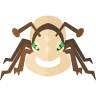

In [75]:
img_format = '.jpg'
idx = 
img_list = list(img_path.glob('*.png'))
img = PIL.Image.open(img_list[idx])
img_name = img_list[idx].stem.split('@')[0] + img_format
img_name
img

In [84]:
img_paths

<generator object Path.glob at 0x7f4b10385c50>

In [20]:
!rm -rf kratos_dataset_raw

In [21]:
dir_src = Path('./kratos_dataset_raw')
dir_dst = Path('./kratos_dataset')
dir_dst.mkdir(exist_ok=True)
img_format = '.png'
img_paths = dir_src.glob('*')

for img_path in img_paths:
    img_name = img_path.stem.split('@')[0] + img_format
    try:
        img = PIL.Image.open(img_path).convert('RGBA')
        img_rgb = PIL.Image.new("RGB", img.size, (255, 255, 255))
        img_rgb.paste(img, img)
        img_rgb.save(dir_dst / img_name)
    except:
        print(img_path)

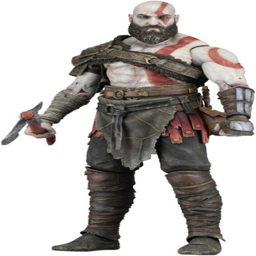

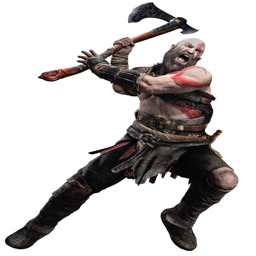

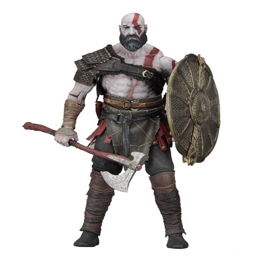

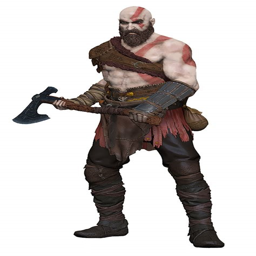

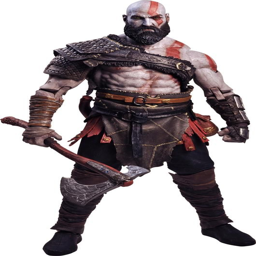

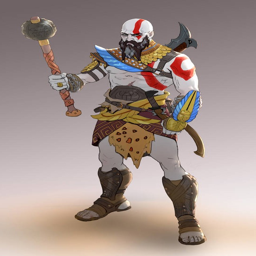

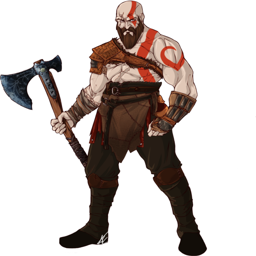

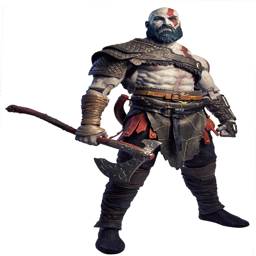

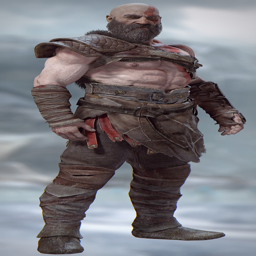

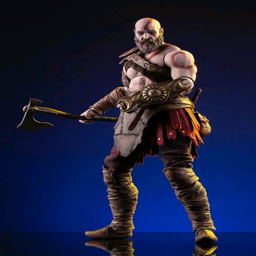

In [22]:
for img_path in list(dir_dst.glob('*')):
    display(PIL.Image.open(img_path).resize((256, 256)))

0 torch.Size([3, 512, 512])


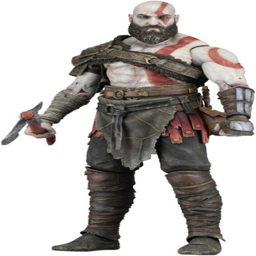

1 torch.Size([3, 512, 512])


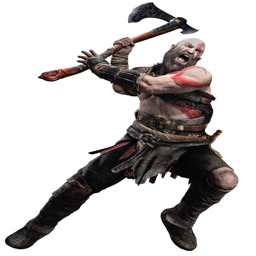

2 torch.Size([3, 512, 512])


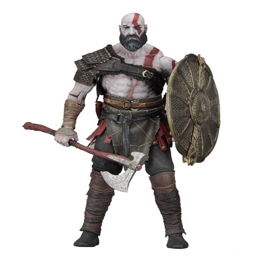

3 torch.Size([3, 512, 512])


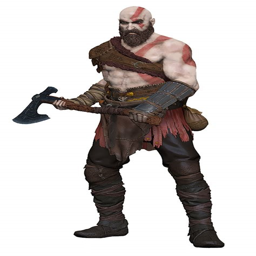

4 torch.Size([3, 512, 512])


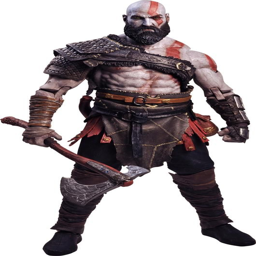

5 torch.Size([3, 512, 512])


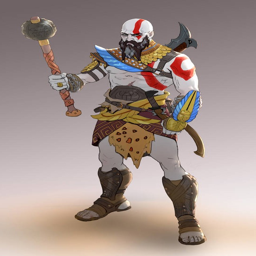

6 torch.Size([3, 512, 512])


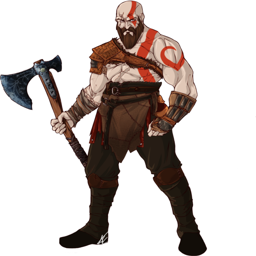

7 torch.Size([3, 512, 512])


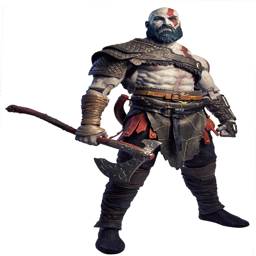

8 torch.Size([3, 512, 512])


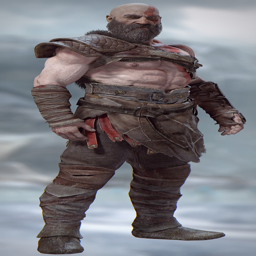

9 torch.Size([3, 512, 512])


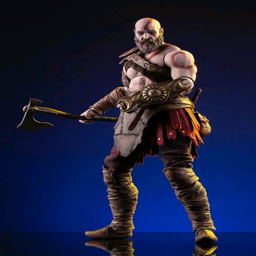

In [23]:
image_preprocess = img_transforms = transforms.Compose([
            transforms.Resize(512),
            transforms.CenterCrop(512),
            transforms.ToTensor(),
            transforms.Normalize([0.5], [0.5])
])

for i, img_path in enumerate(list(dir_dst.glob('*'))):
    image = PIL.Image.open(img_path)
    image_t = image_preprocess(PIL.Image.open(img_path))
    print(i, image_t.shape)
    display(image.resize((256, 256)))

In [26]:
dataset_dict = dict()
dataset_dict['image'] = [str(img_path) for img_path in list(dir_dst.glob('*'))]
# dataset_dict['label'] = [img.split('/')[-1].split('.')[0].replace('-', '_') for img in dataset_dict['image']]

In [27]:
from datasets import Dataset, Image
kratos_dataset = Dataset.from_dict(dataset_dict).cast_column("image", Image())

In [28]:
kratos_dataset

Dataset({
    features: ['image'],
    num_rows: 10
})

006_charizard_shiny


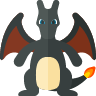

In [46]:
print(pokemon_cute[10]['label'])
pokemon_cute[10]['image']

In [29]:
kratos_dataset.push_to_hub("matteopilotto/kratos")

  0%|          | 0/1 [00:00<?, ?ba/s]

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Deleting unused files from dataset repository:   0%|          | 0/1 [00:00<?, ?it/s]

Updating downloaded metadata with the new split.
